<a href="https://colab.research.google.com/github/Leeyeji13/Section2_project/blob/main/ai_13_%EC%9D%B4%EC%98%88%EC%A7%802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to predict Airline Passengers Satisfaction

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,995 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [2]:
!pip install eli5

     |████████████████████████████████| 216 kB 7.3 MB/s 
     |████████████████████████████████| 133 kB 34.4 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=47ccf98fc402ce36c4832cd1e8af3574cad750abb7d94e0051e4dc2868b166c7
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [84]:
from google.colab import files
import pandas as pd
import io
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_regression
import eli5
from eli5.sklearn import PermutationImportance
import time
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, plot_confusion_matrix, plot_roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.rcParams.update({'figure.max_open_warning': 0})
plt.rc('font', family='NanumBarunGothic')

## 데이터 불러오기

In [4]:
uploaded1 = files.upload()
uploaded2 = files.upload()

Saving train.csv to train.csv


Saving test.csv to test.csv


In [90]:
train = pd.read_csv(io.StringIO(uploaded1['train.csv'].decode('utf8')))
test = pd.read_csv(io.StringIO(uploaded2['test.csv'].decode('utf8')))

In [91]:
train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [92]:
test.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [94]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

***-> Gender, Customer Type, Type of Travel, Class : 범주형 데이터***

***-> Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes 를 제외한 features : 0 ~ 5 사이의 정도를 나타내는 정수형***

### 결측치

In [95]:
train.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [96]:
test.isna().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


***-> Arrival Delay in Minutes에 결측치가 train과 test set 모두 존재.***

***=> 전체에 비해 결측치의 비율이 미미하지만 test 안에도 존재하기 때문에 제거보다는 대체하는 것이 좋을 것 같으며, 최빈값이나 평균보다는 0이라는 값으로 대체하는 것으로 대체하는 것이 적절하다고 판단.***

In [97]:
train['Arrival Delay in Minutes'] = train['Arrival Delay in Minutes'].fillna(0)
test['Arrival Delay in Minutes'] = test['Arrival Delay in Minutes'].fillna(0)

In [98]:
train.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [99]:
test.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## EDA

### features 분포

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


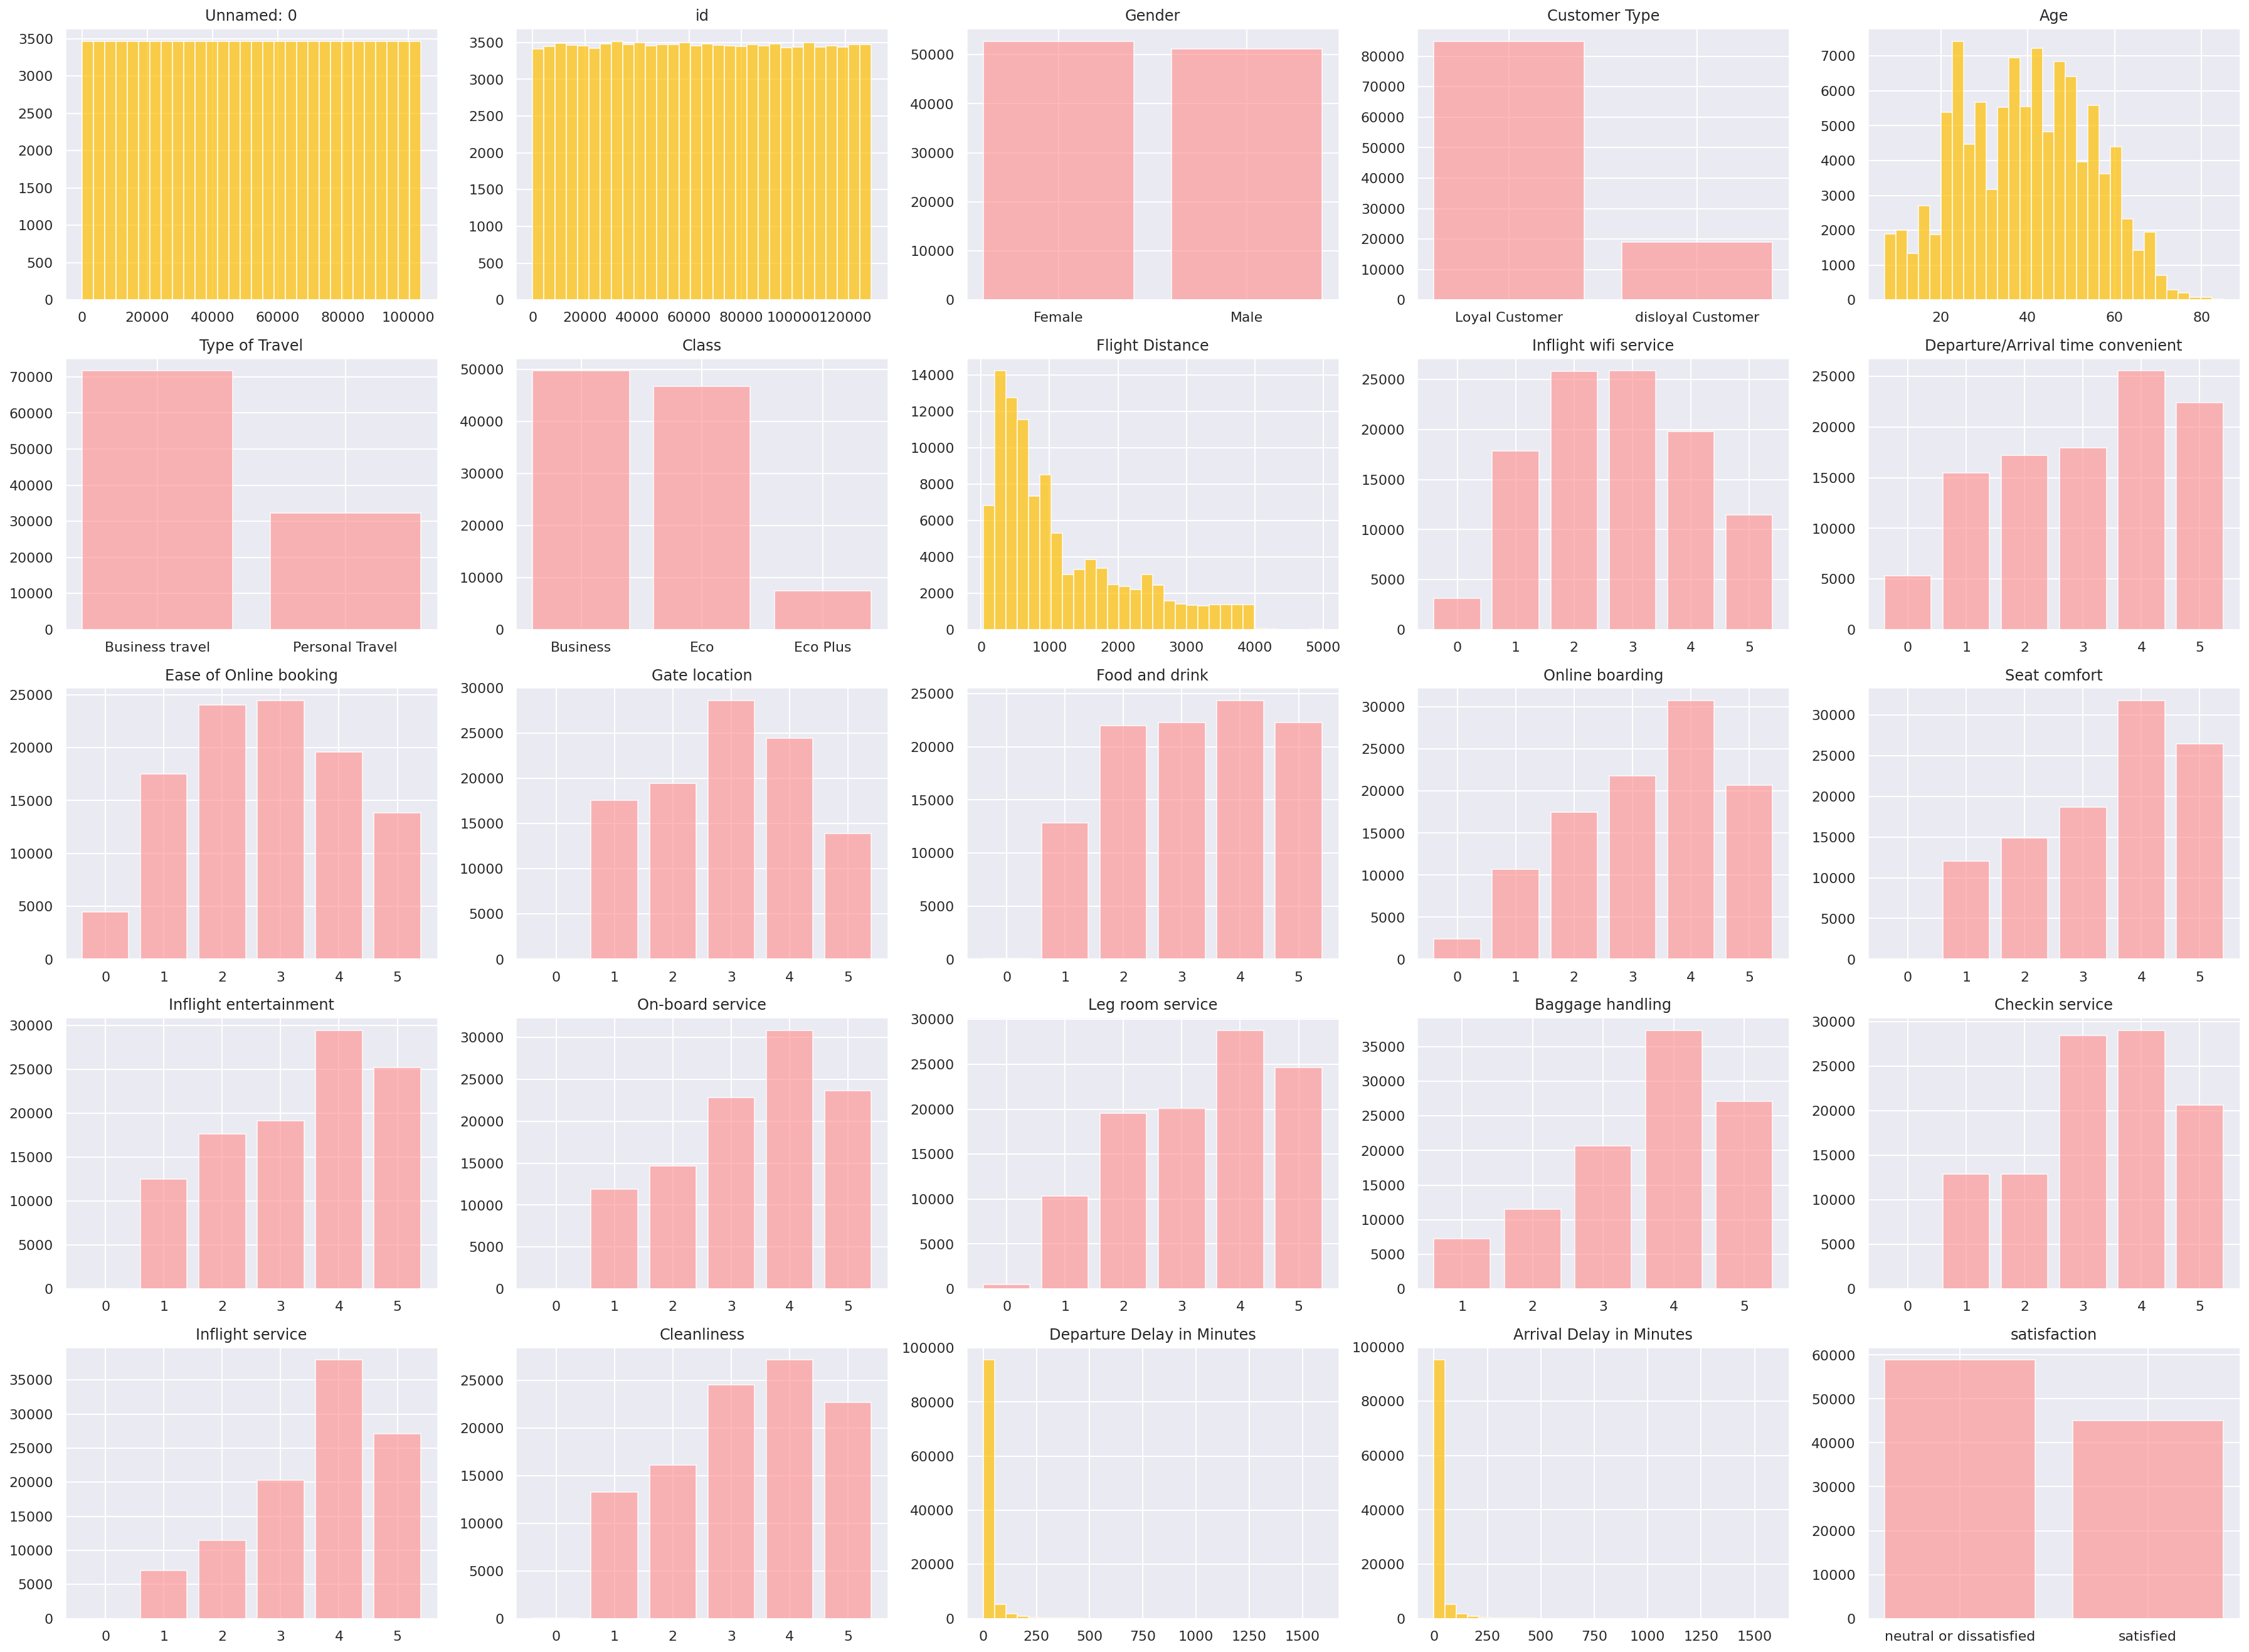

In [100]:
plt.figure(figsize = (25, 20))
for i in range(len(train.columns)):
  plt.subplot(5, 5, i + 1) # 최대 5 by 5, 25개의 특징 분포를 확인 가능
  plt.title(train.columns[i])
  if len(train[train.columns[i]].unique()) > 10: # 해당 특징의 고유한 값 종류가 10개가 넘으면 히스토그램으로 출력
    plt.hist(train[train.columns[i]], color = '#ffc000', bins = 30, alpha = 0.7) # bins는 칸을 나누는 값, alpha는 투명도
  else: # 해당 특징의 고유한 값 종류가 10개가 넘지 않으면 바플롯으로 출력
    plt.bar(train[train.columns[i]].value_counts().keys(), train[train.columns[i]].value_counts().values, color = '#ff9999', alpha = 0.7)
plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

***-> 분홍 그래프가 그래프는 2개 혹은 5개의 값으로 이루어져 있음.***

***-> 노란 그래프는 연속된 값들***

***-> 노란 그래프에서 Age를 제외하고는 왼쪽으로 치우쳐저 있음을 확인할 수 있음***

### target 확인

In [101]:
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [102]:
target = 'satisfaction'
train[target].value_counts(normalize = True)

0    0.566667
1    0.433333
Name: satisfaction, dtype: float64

Text(0.5, 1.0, "Passengers' Satisfaction Rate")

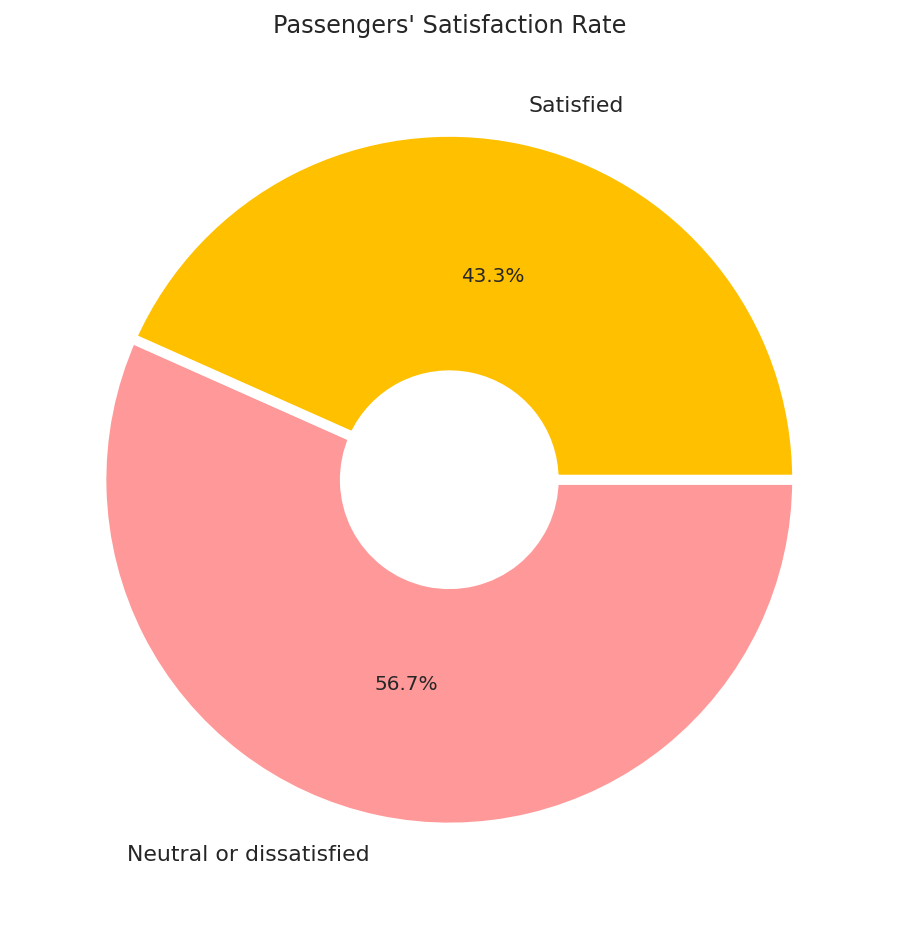

In [103]:
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(8, 8))
train[target].value_counts().plot(kind = "pie", autopct = '%1.1f%%', colors = ['#ff9999', '#ffc000'], counterclock = False, wedgeprops = wedgeprops, labels = ["Neutral or dissatisfied", "Satisfied"])
plt.ylabel("")
plt.title("Passengers' Satisfaction Rate")

***=> Baseline : 0.57***

### target과 feature들의 관계

In [104]:
train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

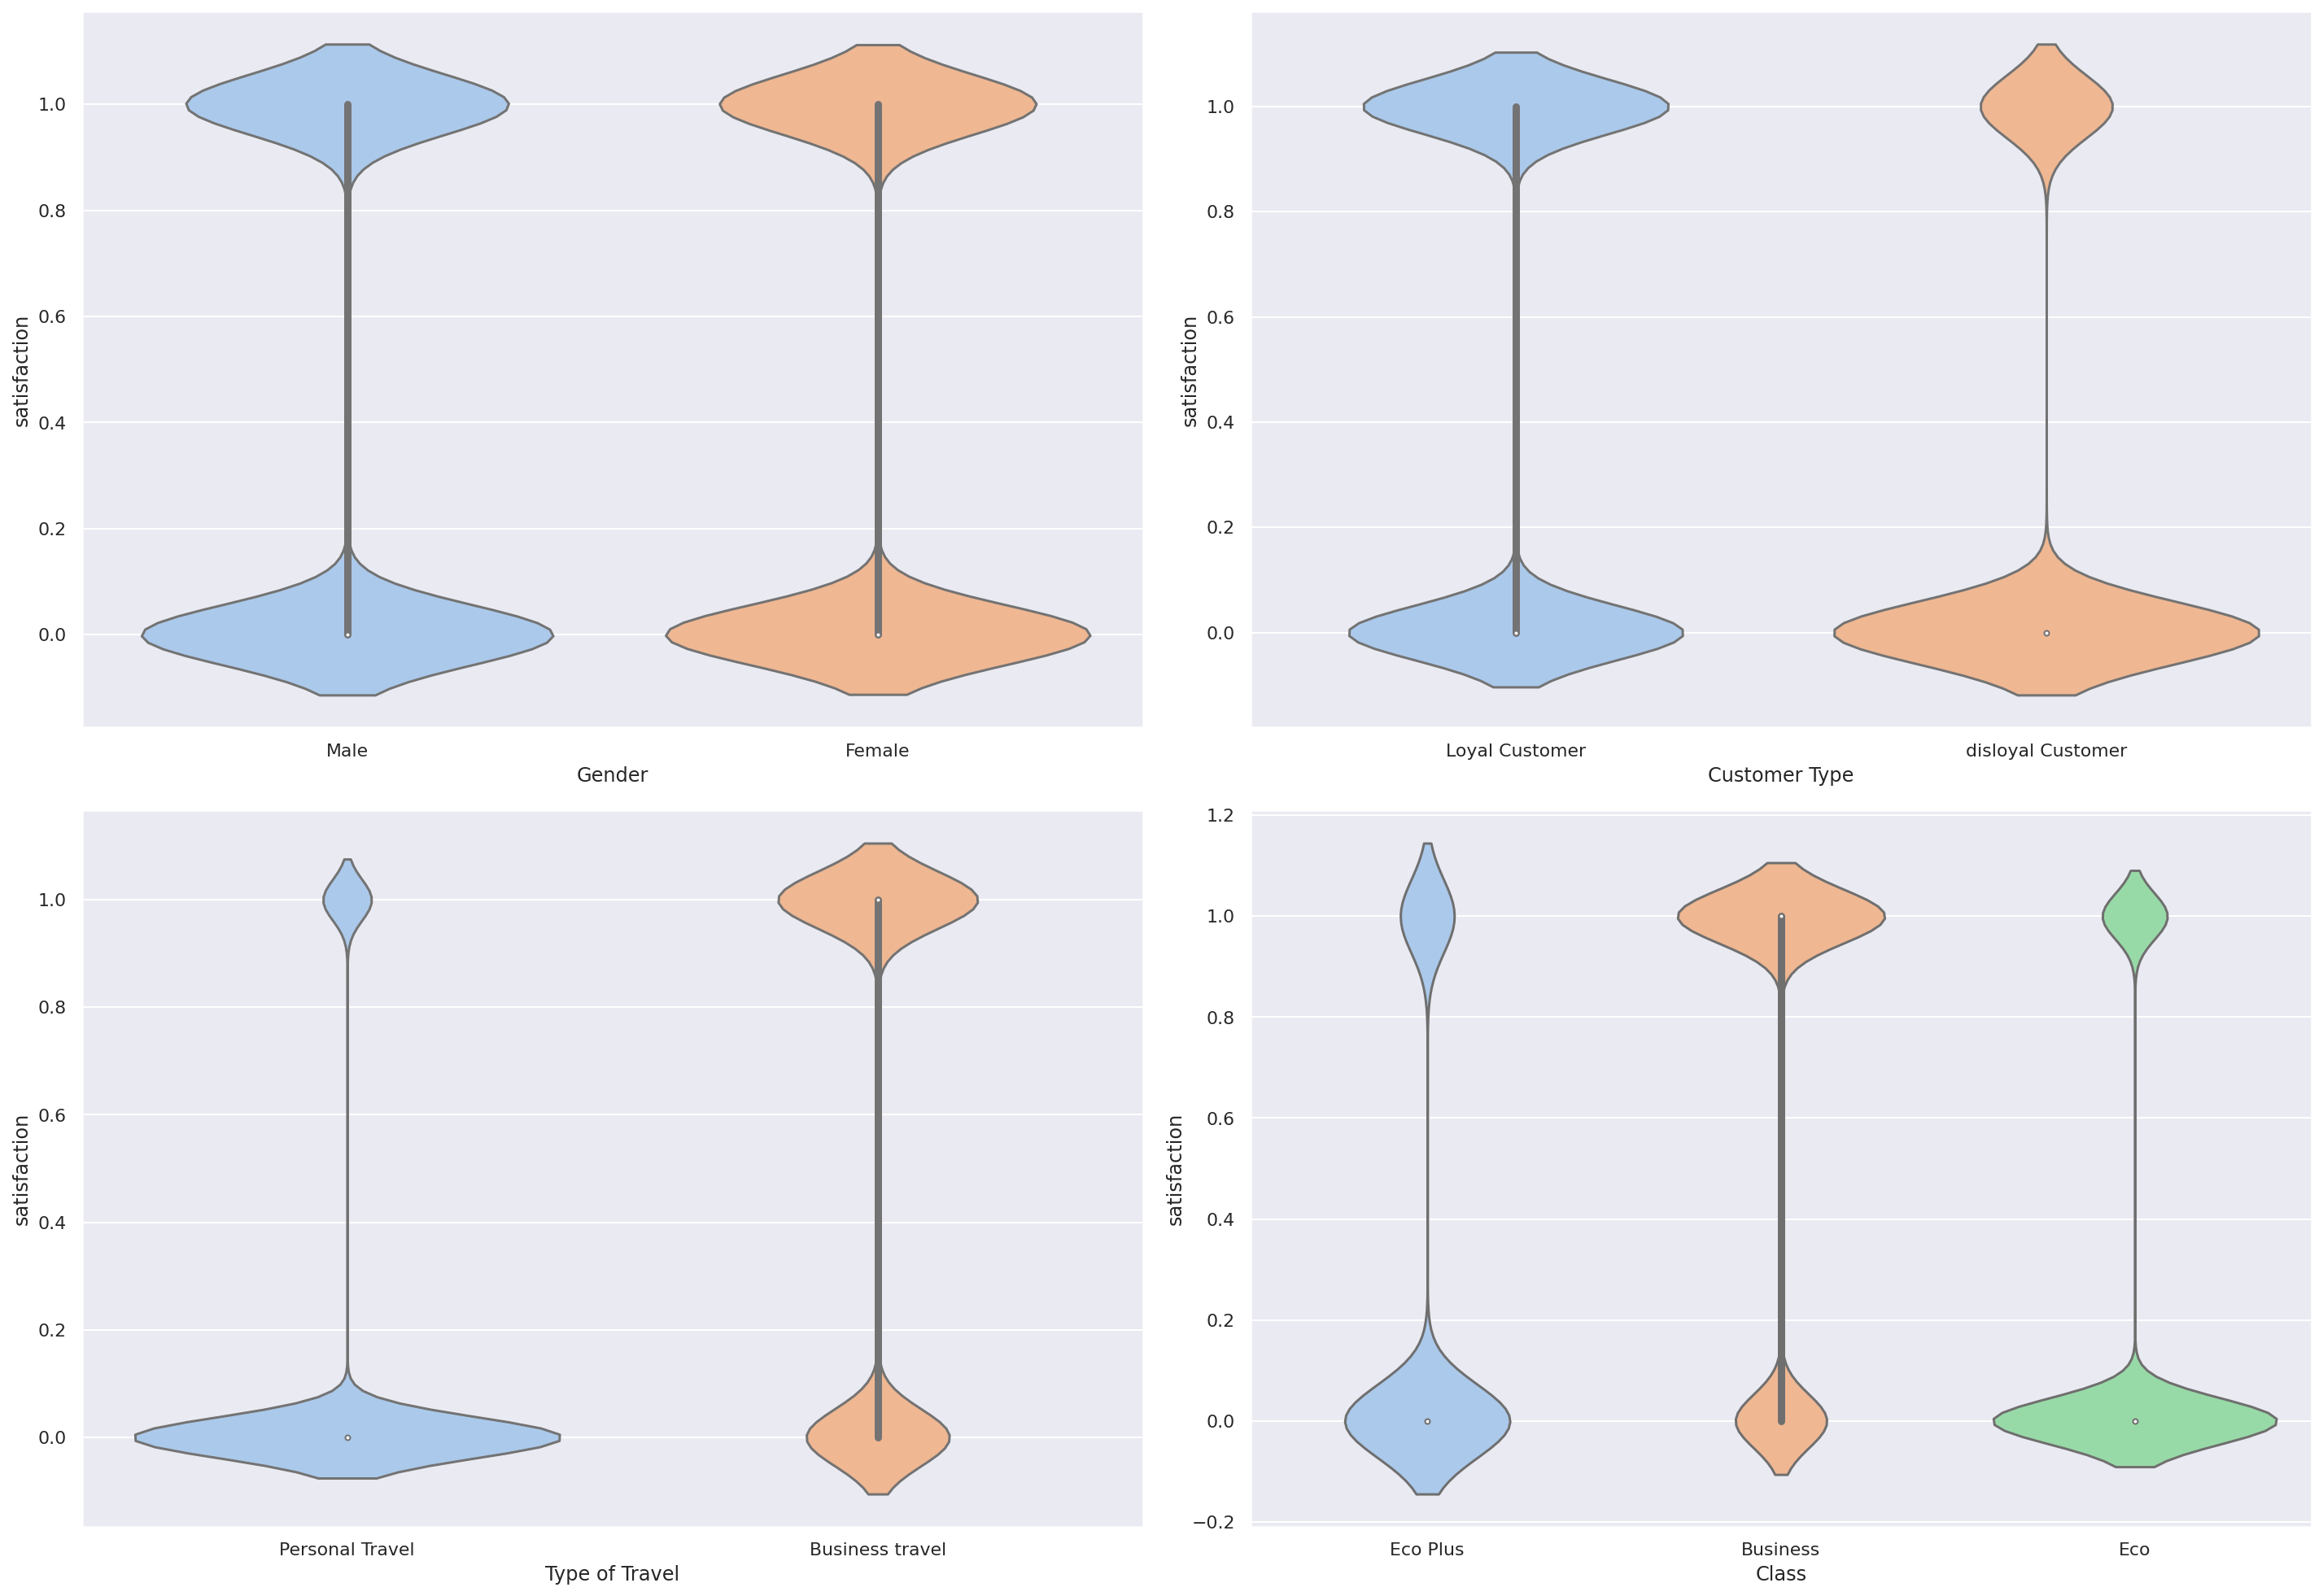

In [105]:
categorical_feature = train.columns[train.dtypes == 'object']

plt.figure(figsize = (20, 15))

for i in range(len(categorical_feature)):
  plt.subplot(2, 2, i + 1)
  plt.xlabel(categorical_feature[i])
  plt.ylabel(target)
  sns.set(palette = 'pastel')
  sns.violinplot(x = train[categorical_feature[i]], y = train[target])
plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

***-> target은 0(불만족)과 1(만족)로 이루어져 있다***

***=> Customer Type의 경우,***

***=> Type of Travel의 경우, ***

***=> Class의 경우, ***

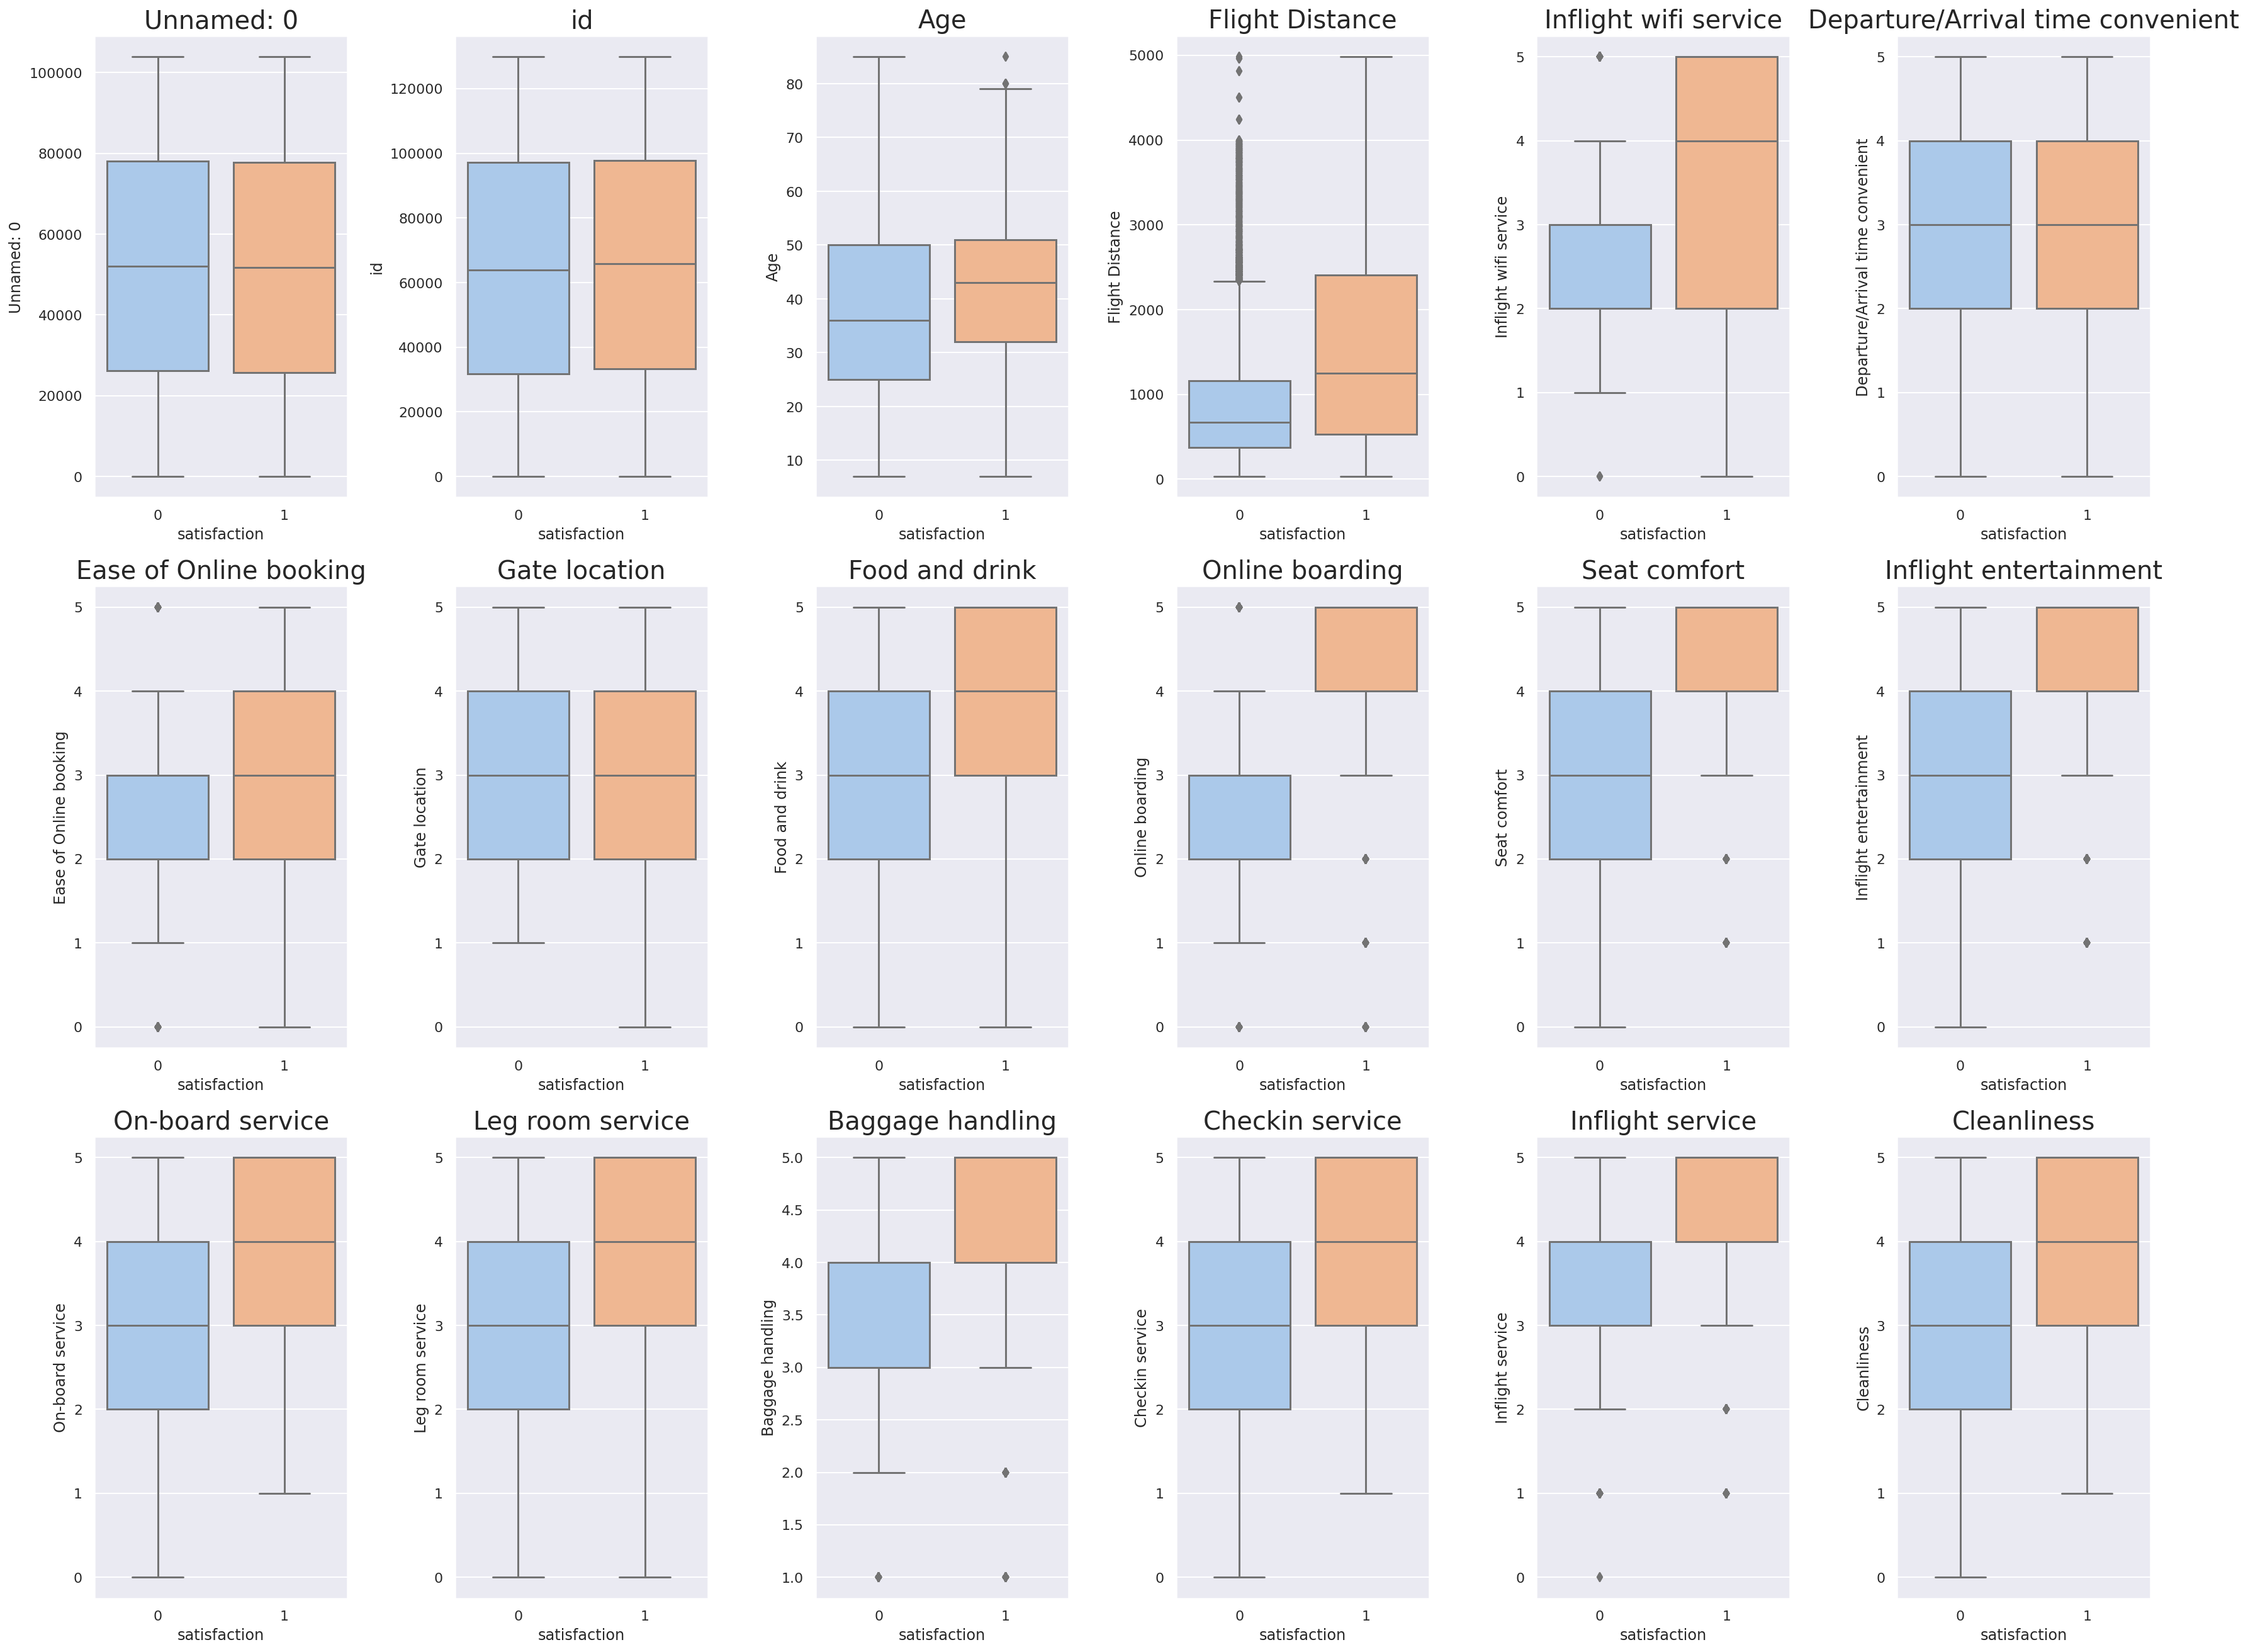

In [106]:
numeric_features = train.columns[(train.dtypes == 'int64') | (train.dtypes == 'float64')]

fig, axes = plt.subplots(3, 6, figsize = (25, 20))

for ax, col in zip(axes.flat, train[numeric_features].columns[:-1]):
  sns.boxplot(x = target, y = col, ax = ax, data = train[numeric_features])
  ax.set_title(col, fontsize = 20)
plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

-> 박스들이 중간에 있을수록, 이상치가 없을수록 골고루 분포되어있는 것으로 해석할 수 있다.

=> 즉, target이 0이던 1이던 골고루 있다는 것은 그렇게 중요한 특징이 아니라는 것이다.

-> age, departure/arrival time convenient, gate location 등 별 연관이 없어 보인다.

### 범주형특성 라벨인코딩

In [107]:
train.dtypes == 'object'

Unnamed: 0                           False
id                                   False
Gender                                True
Customer Type                         True
Age                                  False
Type of Travel                        True
Class                                 True
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Del

In [108]:
for col in train.select_dtypes(include=['object']).columns:
      print(col , " : " , train[col].unique())

Gender  :  ['Male' 'Female']
Customer Type  :  ['Loyal Customer' 'disloyal Customer']
Type of Travel  :  ['Personal Travel' 'Business travel']
Class  :  ['Eco Plus' 'Business' 'Eco']


In [109]:
def categorical_encoding(df):
  lencoders = {}
  for col in df.select_dtypes(include=['object']).columns:
      lencoders[col] = LabelEncoder()
      df[col] = lencoders[col].fit_transform(df[col])

In [110]:
categorical_encoding(train)
categorical_encoding(test)

In [111]:
train.dtypes == 'object'

Unnamed: 0                           False
id                                   False
Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Del

### 상관계수

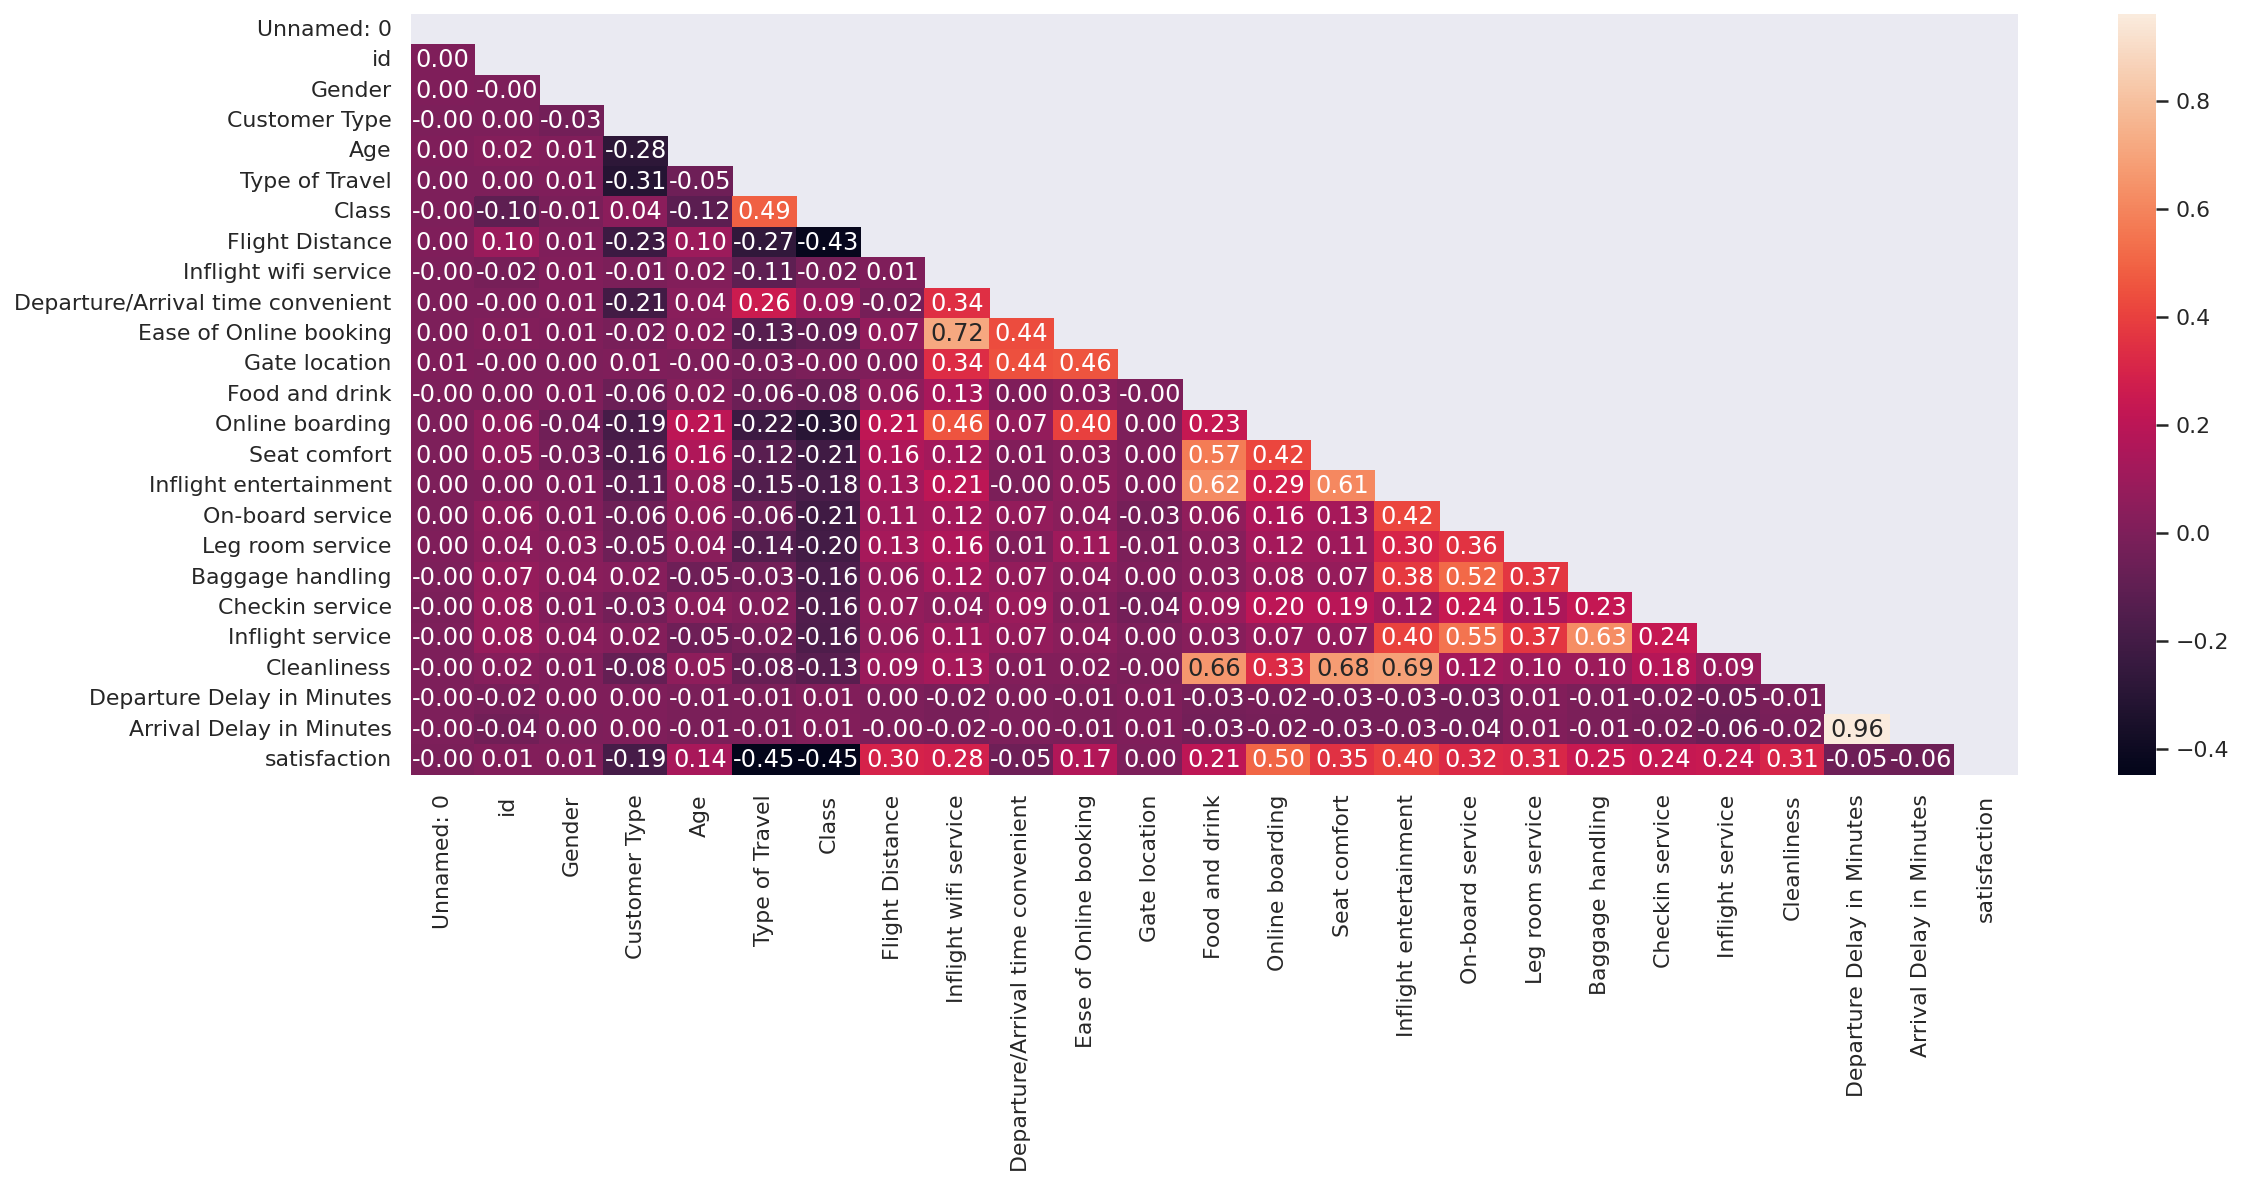

In [112]:
plt.figure(figsize = (18, 7))
mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))
sns.heatmap(train.corr(), annot = True, mask = mask, fmt = '0.2f')
plt.show()

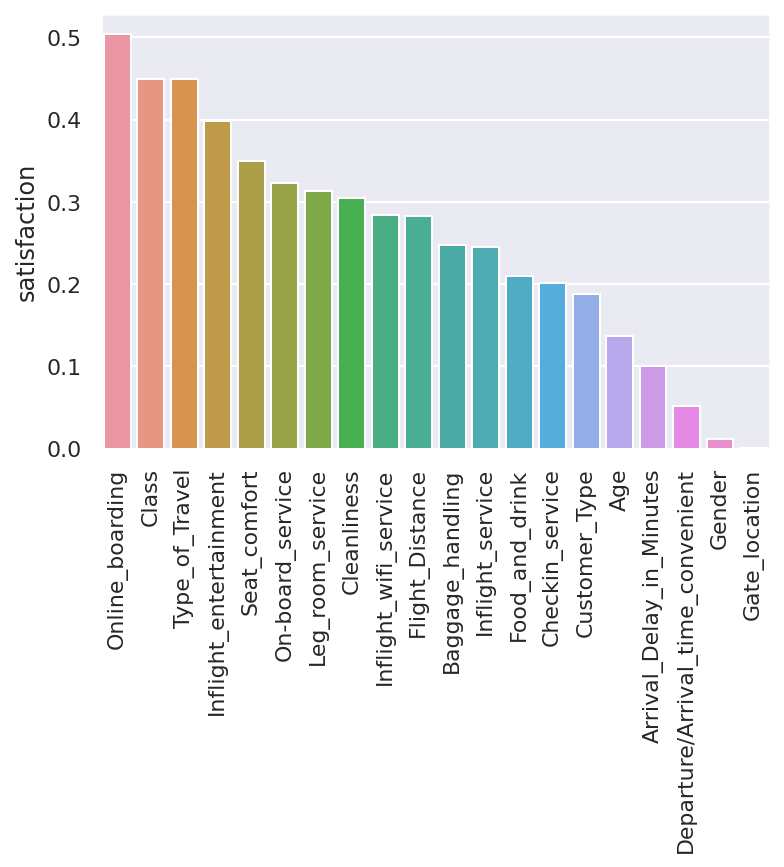

In [131]:
plt.xticks(rotation = 90)
sns.barplot(x = abs(train.corr()[target]).sort_values(ascending = False)[1:].index, y = abs(train.corr()[target]).sort_values(ascending = False)[1:])

상관계수의 값이 낮다고 해서 상관계수가 안 좋은 것이 아니라 절대값을 봐야 한다.

target을 기준으로 상관계수가 낮은 것

* gender, departure/arrival time convenient, gate location, departure delay in minutes, arrival delay in minutes 등등

target을 기준으로 상관계수가 높은 것

* online boarding, type of travel, class 등등

다중공선성 : 독립변수들이 서로 독립적인 관계여야 한다.

-> 주로 상관계수 0.7 이상일 때 다중공선성이 나타난다

departure delay in minutes & arrival delay in minutes

* 출발 시간이 지연되면 당연히 도착시간도 지연된다. -> 상관계수 0.96로 매우 높은 상관관계를 가진다.

Ease of Online booking & Inflight wifi service

* 온라인 예약이 쉬울 수록 항공기 와이파이 서비스가 잘 되어있을 것이므로 높게 나타난 것으로 추정된다.

다중공선성 해결법 => 둘 중 한 특징을 제거

1. departure delay in minutes & arrival delay in minutes (-0.05/ -0.06)

* departure delay in minutes 제거

2. Ease of Online booking & Inflight wifi service (0.17/ 0.28)

* ease of online booking 제거

In [113]:
#쓸데없는 컬럼 제거
train.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
test.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)

In [114]:
#다중공선성 해결
train.drop(['Departure Delay in Minutes', 'Ease of Online booking'], axis = 1, inplace = True)
test.drop(['Departure Delay in Minutes', 'Ease of Online booking'], axis = 1, inplace = True)

In [115]:
#칼럼명 정리
train.columns = [c.replace(' ','_') for c in train.columns]
test.columns = [c.replace(' ','_') for c in test.columns]

### 이상치

In [116]:
train.describe()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Gate_location,Food_and_drink,...,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Arrival_Delay_in_Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,0.492541,0.182678,39.379706,0.310373,0.594135,1189.448375,2.729683,3.060296,2.976883,3.202129,...,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,15.133392,0.433333
std,0.499947,0.386404,15.114964,0.462649,0.620799,997.147281,1.327829,1.525075,1.277621,1.329533,...,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.649776,0.495538
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,0.000000,0.000000,40.000000,0.000000,1.000000,843.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,1.000000,0.000000,51.000000,1.000000,1.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1584.000000,1.000000


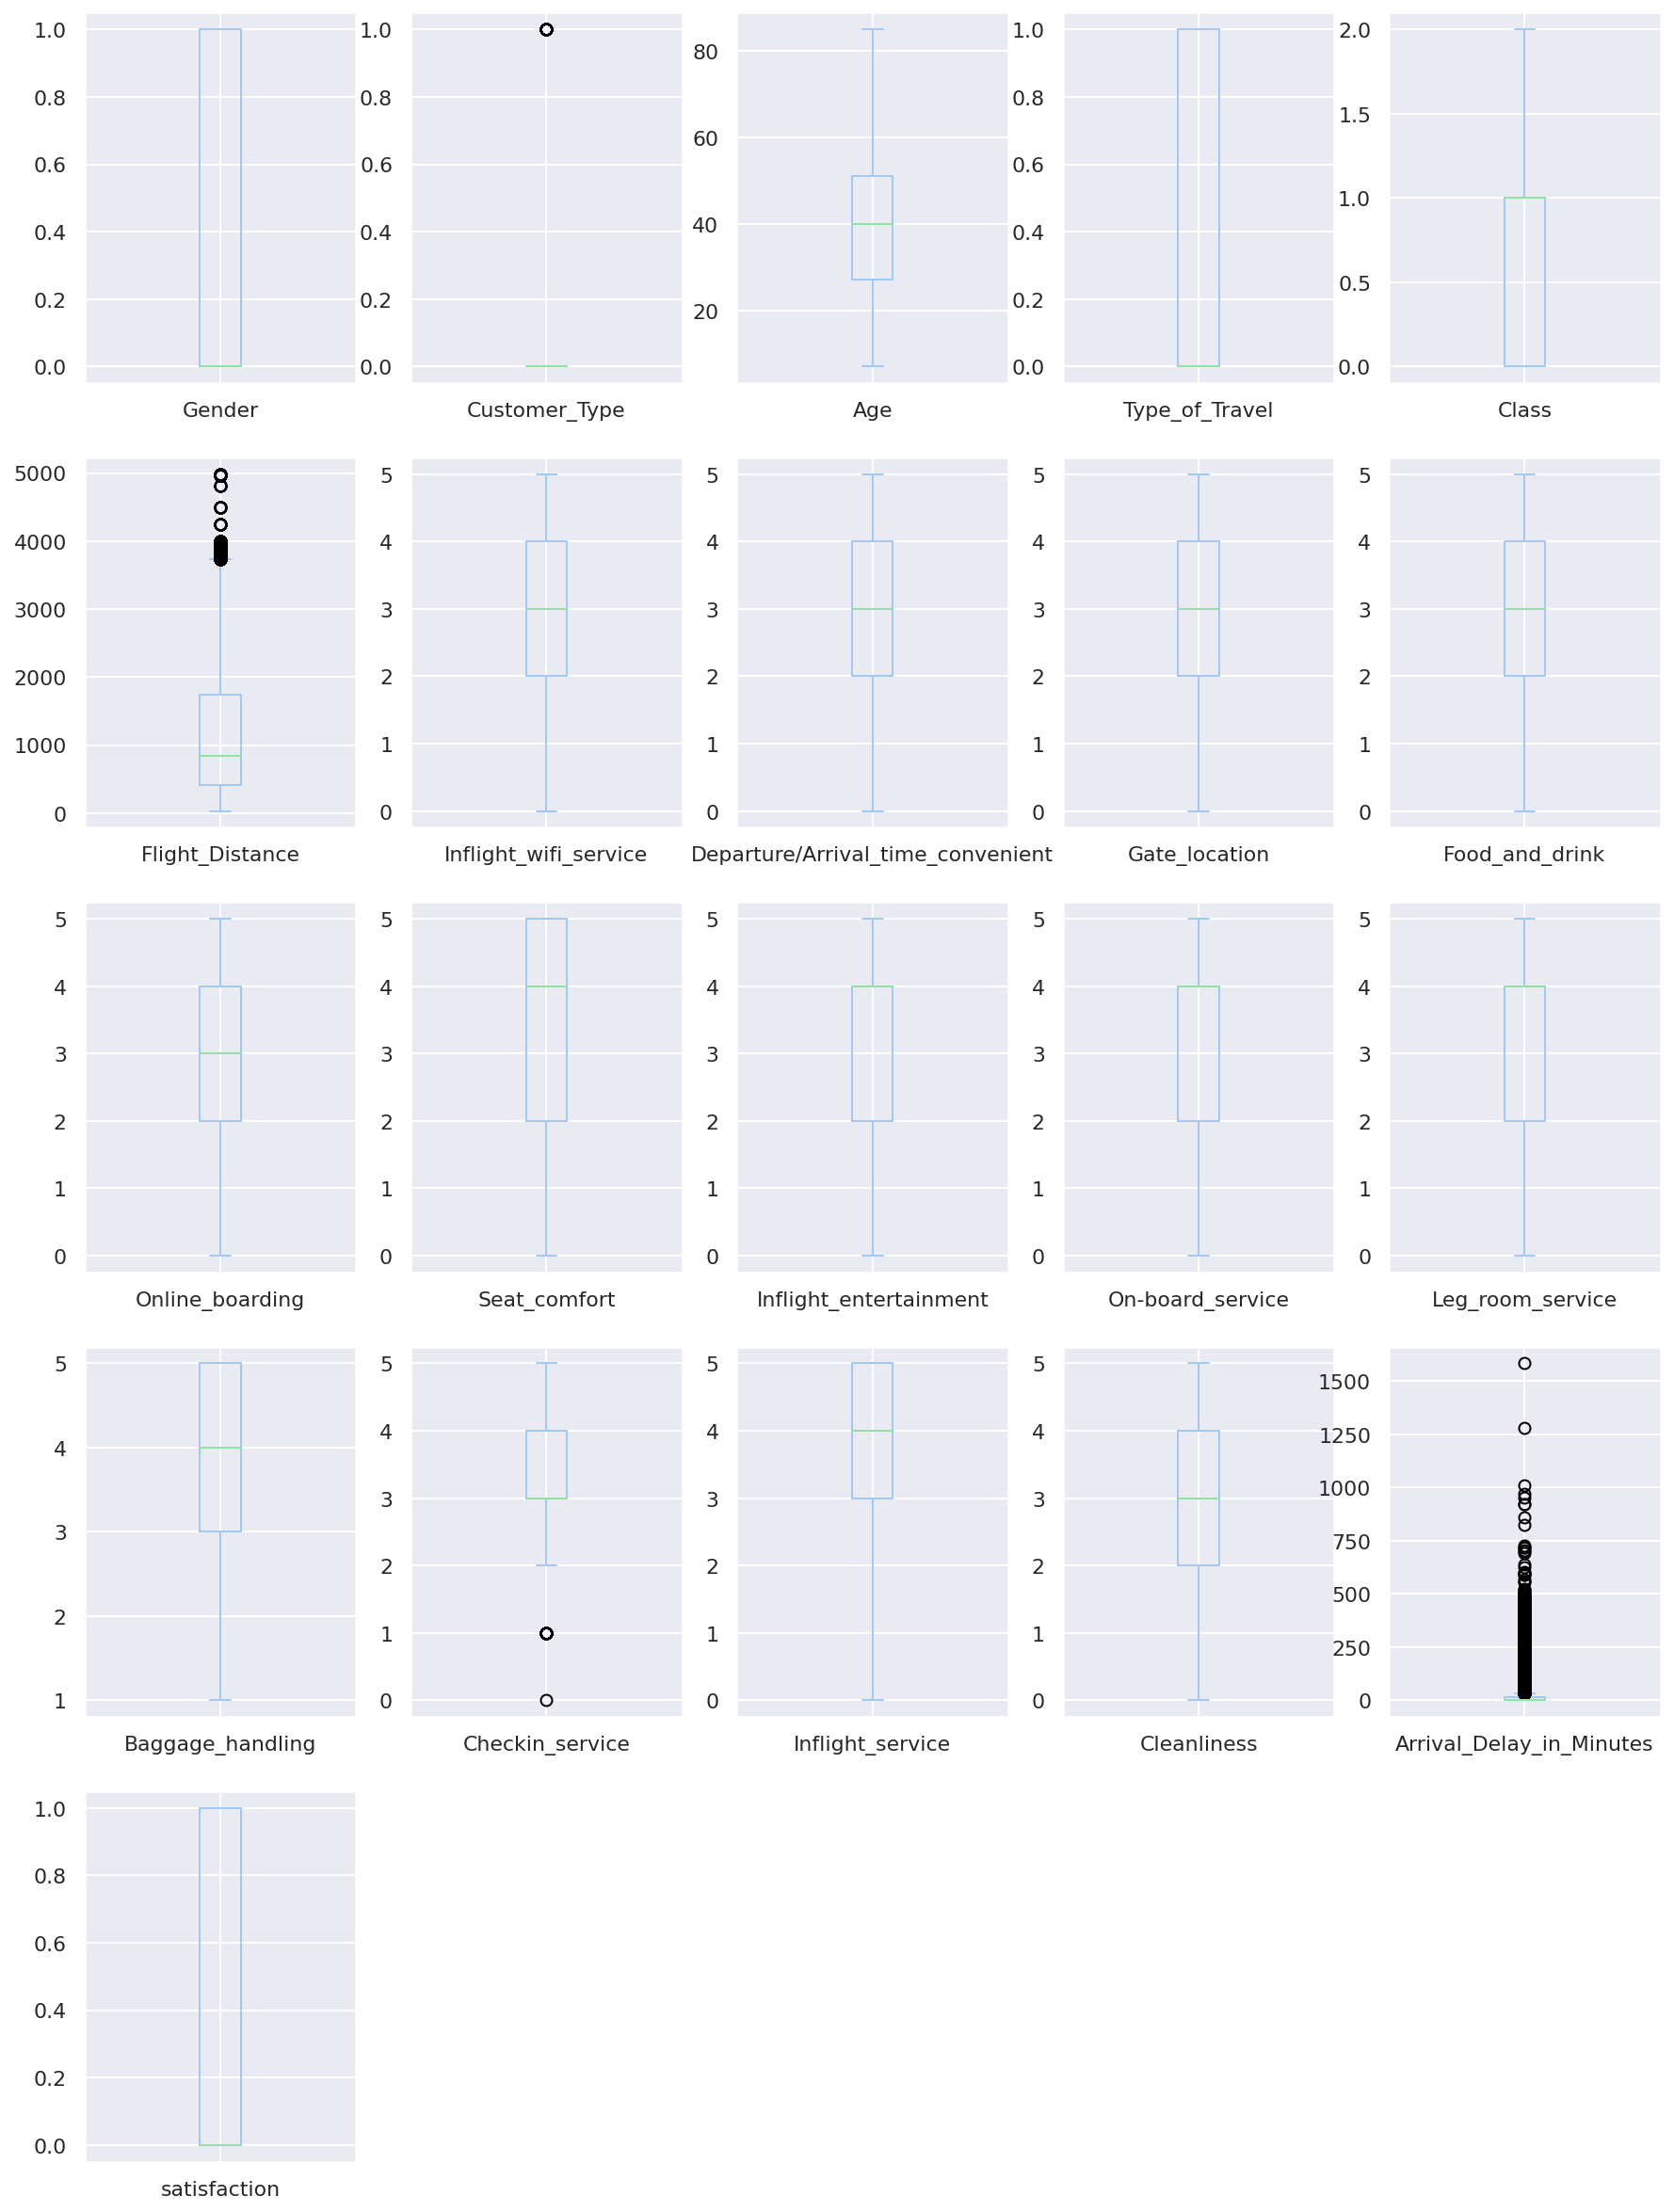

In [117]:
train.plot(kind = "box", subplots = True, layout = (5, 5), figsize = (15, 21))
plt.show()

=> 출발/도착 지연시간에 대해서 이상치가 매우 많다.

이상치 있는 컬럼 : arrival delay in minutes, checkin service, flight distance

In [119]:
def outliers_iqr(data):
  q1, q3 = np.percentile(data, [25, 75])
  iqr = q3 - q1
  lower = q1 - (iqr * 1.5)
  upper = q3 + (iqr * 1.5)
  return np.where((data > upper) | (data < lower))

In [126]:
arrivaldelay_num = outliers_iqr(train['Arrival_Delay_in_Minutes'])[0]
checkin_num = outliers_iqr(train['Checkin_service'])[0]
flight_num = outliers_iqr(train['Flight_Distance'])[0]
arrivaldelay_num
#제거할까 봤더니 너무 많네,,,

array([    14,     16,     24, ..., 103869, 103881, 103892])

In [127]:
train.loc[arrivaldelay_num, 'Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].mean()
train.loc[checkin_num, 'Checkin_service'] = train['Checkin_service'].mean()
train.loc[flight_num, 'Flight_Distance'] = train['Flight_Distance'].mean()

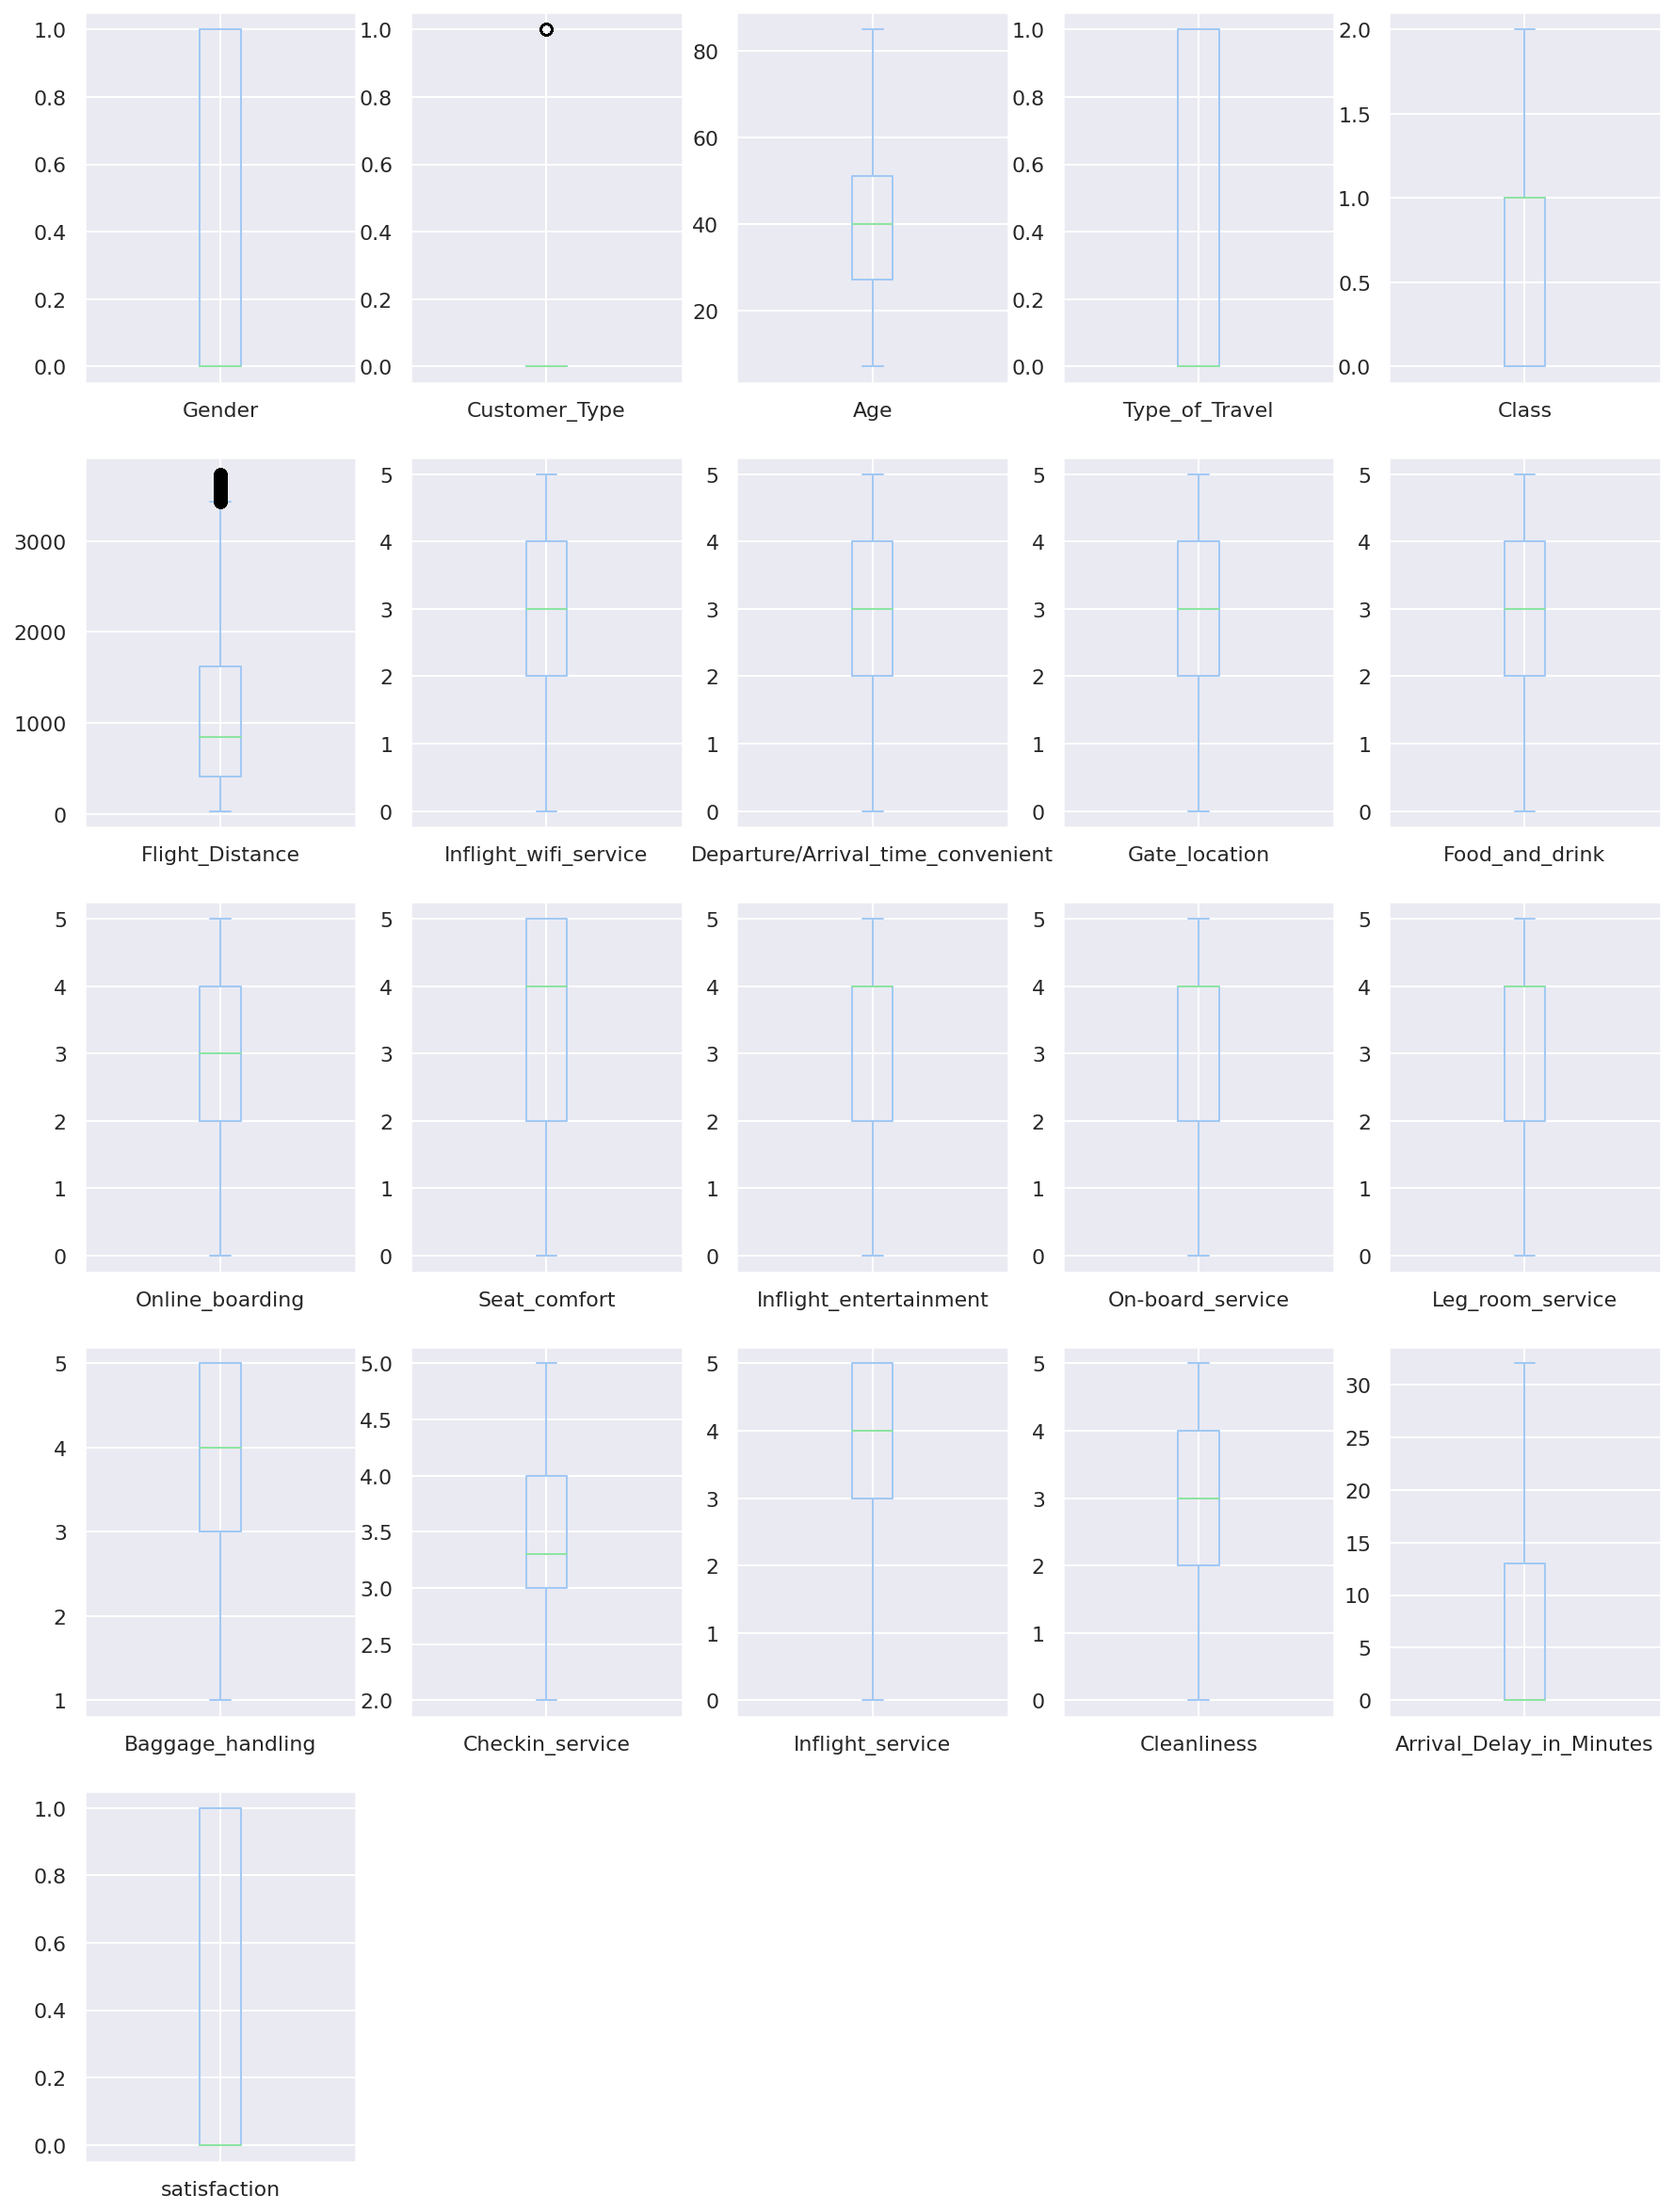

In [128]:
train.plot(kind = "box", subplots = True, layout = (5, 5), figsize = (15, 21))
plt.show()

In [129]:
arrivaldelay_num = outliers_iqr(test['Arrival_Delay_in_Minutes'])[0]
checkin_num = outliers_iqr(test['Checkin_service'])[0]
flight_num = outliers_iqr(test['Flight_Distance'])[0]
test.loc[arrivaldelay_num, 'Arrival_Delay_in_Minutes'] = test['Arrival_Delay_in_Minutes'].mean()
test.loc[checkin_num, 'Checkin_service'] = test['Checkin_service'].mean()
test.loc[flight_num, 'Flight_Distance'] = test['Flight_Distance'].mean()